In [3]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
path = 'input/'

data =  pd.read_csv(path + "train.csv")
data_label =  pd.read_csv(path + "train_label.csv")

In [6]:
# data + data_label 
# data['DIAG_NM'] = data_label

label_dict =  dict([(i,a) for i,a in zip(data_label['SAMPLE_EMAIL'], data_label['DIAG_NM'])])

# DIAG_NM
data['DIAG_NM'] = data['EMAIL'].map(label_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327 entries, 0 to 9326
Data columns (total 66 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9327 non-null   object 
 1   summary_date                              9327 non-null   object 
 2   activity_average_met                      9327 non-null   float64
 3   activity_cal_active                       9327 non-null   int64  
 4   activity_cal_total                        9327 non-null   int64  
 5   activity_class_5min                       9327 non-null   object 
 6   activity_daily_movement                   9327 non-null   int64  
 7   activity_high                             9327 non-null   int64  
 8   activity_inactive                         9327 non-null   int64  
 9   activity_inactivity_alerts                9327 non-null   int64  
 10  activity_low                        

In [7]:
data.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,...,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,sleep_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8),DIAG_NM
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,...,14346,0,417,0,...,-0.12,99.99,NaN,\r,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...,CN
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,...,6352,0,473,0,...,-0.32,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...,CN
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,...,7297,0,586,0,...,0.07,99.99,NaN,\r,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...,CN
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,...,491,0,176,0,...,-0.41,99.99,NaN,\r,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...,CN
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,...,5861,0,646,0,...,-0.27,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...,CN


# MET 란 무엇입니까?  
https://www.healthline.com/health/what-exercise-burns-the-most-calories  

MET는 안정 시 대사율에 대한 작업 대사율의 비율입니다. 대사율은 단위 시간당 소비되는 에너지의 비율입니다. 운동이나 활동의 강도를 설명하는 한 가지 방법입니다.  

하나의 MET는 앉아서 쉬는 데 소비하는 에너지, 즉 휴식 시 또는 기초 대사율 입니다. 따라서 MET 값이 4인 활동은 가만히 앉아 있을 때보다 4배의 에너지를 발휘하고 있음을 의미합니다.  

원근법에 따라 시속 3~4마일로 빠르게 걷는 것은 4 MET의 값을 갖습니다. 보다 격렬한 활동인 줄넘기는 MET 값이 12.3입니다.

## 요약
MET = 대사 등가물.  
1 MET는 쉬거나 가만히 앉아 있을 때 사용하는 에너지로 정의됩니다.  
4 MET의 값을 갖는 활동은 가만히 앉아 있을 때보다 4배의 에너지를 발휘하고 있음을 의미합니다.

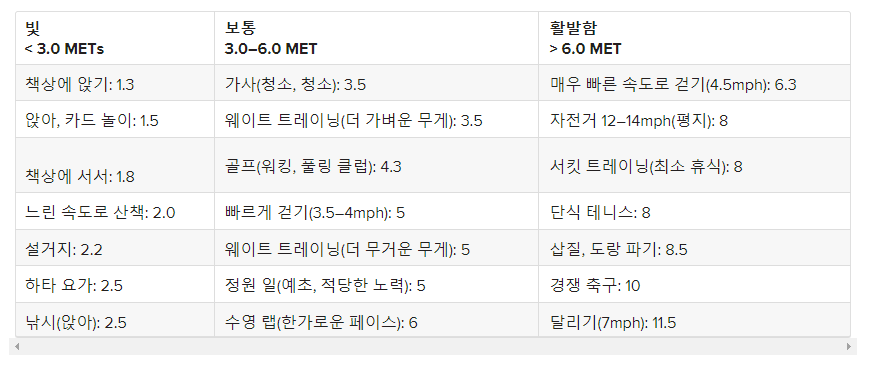

In [1]:
# ---------------------------------------------------------------------------------

In [2]:
# 논문 review

# 치매 예측 모델 및 가장 오래된 신경병리학 
# 즉, Vanta 85 이상 코호트 연구

- Prediction models for dementia and neuropathology in the oldest old: the Vantaa 85+ cohort study

신경병리학

- 신경병리는 말초신경과 중추신경에 일어나는 모든 질병을 대상으로 질병의 원인부터 임상 발현까지를 연구하는 병리학의 세부 분야 중 하나이다.

Vanta
- 신경자극기 중 하나로, 비충전식 신경자극기 이다. 
- 미국 식품의약국(FDA)은 24일(현지 시간), 메드트로닉의 신경자극기 ‘인텔리스’(Intellis)와 ‘반타’(Vanta)를 당뇨병성말초신경염(DPN) 관련 만성 통증 치료요법으로 승인했다.

출처 : 헬스코리아뉴스(http://www.hkn24.com)

- 척수신경자극술은 난치성 통증 치료를 위해 경막외강에 신경자극기를 삽입해 뇌로 전달되는 통증 전달을 차단하는 시술이다.

출처 : 헬스코리아뉴스(http://www.hkn24.com)



코호트 연구(Cohort study)
- 코호트 연구(Cohort study)는 전향성 추적조사를 의미한다.
- 특정 요인에 노출된 집단과 노출되지 않은 집단을 추적하고 연구 대상 질병의 발생률을 비교하여 요인과 질병 발생 관계를 조사하는 연구 방법이다. 
- 요인 대조 연구(factor-control study)라고도 불린다.

## 배경 : 
- 치매 발생과 뇌 병리 예측을 위한 다인자(multifacotrial) 모델 개발이 목표이다.
- Vanta 85 이상을 사용하는 최고령자부터 코호트 연구를 진행했다.

## 방법 :
- 치매가 없는 참가자들을 baseline에 포함시켰고, 적어도 2년 이상 치매 예측 혹은 병리학에 대한 부검 데이터를 후속조치(관찰) 하였다.  

- 지도 학습 방법에는 sociodemographic, cognitive, clinical, vascular, and lifestyle factors and APOE genotype 를 사용하여 학습을 진행한다.(=모델을 개발시킨다)  

- 신경병리학적 평가에는 β-amyloid, neurofibrillary tangles and neuritic plaques, cerebral amyloid angiopathy (CAA), macro- and microscopic infarcts, α-synuclein pathology, hippocampal sclerosis, and TDP-43가 포함된다.

## 결과 :
- 모델 성능 평가는 AUC 10x10 교차 검증을 통해 평가되었다. 
- 전체 AUC 중 0.73은 치매, 0.64-0.68은 알츠하이머나 아밀로이드 관련 병리학, 0.72는 macroinfarcts, 0.61은 microinfarcts이다.
- 치매 예측 변수는 이전 젊은층에 대한 report와 달랐다.
- 예를 들어, 나이, 성별, 혈관 및 생활 습관은 예측변수가 아니다. (were not predictive)
- 치매 or 병리학 의 예측변수도 달랐다. 왜나하면 인식과 교육은 치매를 예측했지만 알츠하이머나 아밀로이드 관련 병리학은 예측하지 못했기 때문이다. 
- APOE genotype은 모든 모델에 일관되게 존재했다.
- APOE의 대립 유전자는 다른 영향을 끼쳤다. 
- 베타 4 유전자 : 치매를 예측하진 않았지만 알츠하이머나 아밀로이드 관련 병리학은 예측하였다. 
- 베타 2 유전자 : 치매를 예측했지만, 아밀로이드 관련 신경병리학(알츠하이머)에 대해서는 보호하였다. (were not predict 인듯?)
- 베타 3 유전자 : dementia, neurofibrillary tangles, and CAA에 대해 보호했다.
- 따라서 병리(pathology)를 예측할 수 있는 변수(facotrs)들은 거의 없었다.

AUC
- AUC (Area Under the ROC Curve)는 ROC curve의 밑면적을 말한다. 즉, 성능 평가에 있어서 수치적인 기준이 될 수 있는 값으로, 1에 가까울수록 그래프가 좌상단에 근접하게 되므로 좋은 모델이라고 할 수 있다.

Microinfarct(미세 경색) <-> Macroinfarct(비교적 큰 경색)
- 미세 경색 은 일반적 으로 크기가 0.1mm에서 1mm 사이 인 미세한 뇌졸중 입니다. 미세경색은 노인 사망의 25~50%에서 발견됩니다. 미세경색은 알츠하이머병 다음 으로 치매 의 두 번째로 중요한 원인일 수 있습니다 . 

## 결론 :
- 치매 예측에 있어서 젊은 노인 vs oldest 노인에 대해 예측변수는 차이가 있다.
- 또한 치매 or 병리학 은 향후 연구에서 더 신중하게 고려되어야 한다.